In [7]:
# -*- coding: UTF-8 -*-
import sys
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import Row

In [104]:
import matplotlib.pyplot as plt

# 初始化sc和logger

In [2]:
sparkConf = SparkConf().setAppName("RDD_DataFrame_SparkSQL")
sc = SparkContext(conf = sparkConf)
sc.master

'local[*]'

In [11]:
sqlContext = SparkSession.builder.getOrCreate()

In [3]:
logger = sc._jvm.org.apache.log4j
logger.LogManager.getLogger("org"). setLevel( logger.Level.ERROR )
logger.LogManager.getLogger("akka").setLevel( logger.Level.ERROR )
logger.LogManager.getRootLogger().setLevel(logger.Level.ERROR)

# 导入文件 

In [4]:
path = 'file:///mnt/f/AI/Book/other/spark_tmp/PythonProject/data/'
data = sc.textFile(path+'u.user')
data.cache()

file:///mnt/f/AI/Book/other/spark_tmp/PythonProject/data/u.user MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

user id \t movie id \t rating \t time

In [5]:
data.count()

943

In [6]:
data.take(5)

['1|24|M|technician|85711',
 '2|53|F|other|94043',
 '3|23|M|writer|32067',
 '4|24|M|technician|43537',
 '5|33|F|other|15213']

# 生成RDD, DF, SQL

In [42]:
# 分隔数据
user_RDD = data.map(lambda line:line.split('|'))
user_RDD.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [31]:
# 生成Row数据
user_Row = user_RDD.map(lambda x:Row(userid=int(x[0]), 
                                       age=int(x[1]), 
                                       gender=x[2], 
                                       occuption=x[3], 
                                       zipcode=x[4]))
user_Row.take(5)

[Row(age=24, gender='M', occuption='technician', userid=1, zipcode='85711'),
 Row(age=53, gender='F', occuption='other', userid=2, zipcode='94043'),
 Row(age=23, gender='M', occuption='writer', userid=3, zipcode='32067'),
 Row(age=24, gender='M', occuption='technician', userid=4, zipcode='43537'),
 Row(age=33, gender='F', occuption='other', userid=5, zipcode='15213')]

In [32]:
# 生成DF
user_DF = sqlContext.createDataFrame(user_Row)
user_DF.take(5)

[Row(age=24, gender='M', occuption='technician', userid=1, zipcode='85711'),
 Row(age=53, gender='F', occuption='other', userid=2, zipcode='94043'),
 Row(age=23, gender='M', occuption='writer', userid=3, zipcode='32067'),
 Row(age=24, gender='M', occuption='technician', userid=4, zipcode='43537'),
 Row(age=33, gender='F', occuption='other', userid=5, zipcode='15213')]

In [33]:
# 打印模式信息
user_DF.printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occuption: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)



In [34]:
# 查看前5行
user_DF.show(5)

+---+------+----------+------+-------+
|age|gender| occuption|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



In [35]:
# 为DF取个别名
df = user_DF.alias('df')
df.show(5)

+---+------+----------+------+-------+
|age|gender| occuption|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



In [36]:
# 注册成SQL表
user_DF.registerTempTable('user_sql')

In [37]:
# 查看项目数
sqlContext.sql("SELECT count(*) counts_sss FROM user_sql").show()

+----------+
|counts_sss|
+----------+
|       943|
+----------+



In [38]:
sqlContext.sql("""SELECT count(*) counts_666 
                FROM user_sql""").show()

+----------+
|counts_666|
+----------+
|       943|
+----------+



In [39]:
# 查看基本信息
sqlContext.sql("SELECT * FROM user_sql").show()

+---+------+-------------+------+-------+
|age|gender|    occuption|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
| 53|     M|       lawyer|    10|  90703|
| 39|     F|        other|    11|  30329|
| 28|     F|        other|    12|  06405|
| 47|     M|     educator|    13|  29206|
| 45|     M|    scientist|    14|  55106|
| 49|     F|     educator|    15|  97301|
| 21|     M|entertainment|    16|  10309|
| 30|     M|   programmer|    17|  06355|
| 35|     F|        other|    18|  37212|
| 40|     M|    librarian|    19|  02138|
| 42|     F|    homemaker|    20|  95660|
+---+------+-------------+------+-

In [40]:
# 查看前8行
sqlContext.sql("SELECT * FROM user_sql LIMIT 8").show()

+---+------+-------------+------+-------+
|age|gender|    occuption|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
+---+------+-------------+------+-------+



# 筛选字段

In [43]:
user_RDD.map(lambda x:(x[0],x[3],x[2],x[1])).take(5)

[('1', 'technician', 'M', '24'),
 ('2', 'other', 'F', '53'),
 ('3', 'writer', 'M', '23'),
 ('4', 'technician', 'M', '24'),
 ('5', 'other', 'F', '33')]

In [44]:
user_DF.select('userid', 'occuption', 'gender', 'age', ).show(5)

+------+----------+------+---+
|userid| occuption|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [48]:
user_DF.select(df['userid'], df['occuption'], 
               user_DF['gender'], user_DF['age'], ).show(5)

+------+----------+------+---+
|userid| occuption|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [47]:
user_DF.select(user_DF.userid, user_DF.occuption, 
               df.gender, df.age, ).show(5)

+------+----------+------+---+
|userid| occuption|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [49]:
sqlContext.sql("SELECT userid,occuption,gender,age FROM user_sql").show(5)

+------+----------+------+---+
|userid| occuption|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



# 字段计算

In [50]:
user_RDD.map(lambda x:(x[0],x[3],x[2],x[1],2015-int(x[1]))).take(5)

[('1', 'technician', 'M', '24', 1991),
 ('2', 'other', 'F', '53', 1962),
 ('3', 'writer', 'M', '23', 1992),
 ('4', 'technician', 'M', '24', 1991),
 ('5', 'other', 'F', '33', 1982)]

In [54]:
user_DF.select(df['userid'], df['occuption'], 
               user_DF['gender'], user_DF['age'], 
               2015-user_DF['age'], ).show(5)

+------+----------+------+---+------------+
|userid| occuption|gender|age|(2015 - age)|
+------+----------+------+---+------------+
|     1|technician|     M| 24|        1991|
|     2|     other|     F| 53|        1962|
|     3|    writer|     M| 23|        1992|
|     4|technician|     M| 24|        1991|
|     5|     other|     F| 33|        1982|
+------+----------+------+---+------------+
only showing top 5 rows



In [53]:
user_DF.select(user_DF.userid, user_DF.occuption, 
               df.gender, df.age, 
               (2015-df.age).alias('birthyear'), ).show(5)

+------+----------+------+---+---------+
|userid| occuption|gender|age|birthyear|
+------+----------+------+---+---------+
|     1|technician|     M| 24|     1991|
|     2|     other|     F| 53|     1962|
|     3|    writer|     M| 23|     1992|
|     4|technician|     M| 24|     1991|
|     5|     other|     F| 33|     1982|
+------+----------+------+---+---------+
only showing top 5 rows



In [55]:
sqlContext.sql("""SELECT userid,occuption,gender,age,
                2015-age birtheyear FROM user_sql""").show(5)

+------+----------+------+---+----------+
|userid| occuption|gender|age|birtheyear|
+------+----------+------+---+----------+
|     1|technician|     M| 24|      1991|
|     2|     other|     F| 53|      1962|
|     3|    writer|     M| 23|      1992|
|     4|technician|     M| 24|      1991|
|     5|     other|     F| 33|      1982|
+------+----------+------+---+----------+
only showing top 5 rows



# 筛选数据

In [56]:
user_RDD.filter(lambda x:x[3]=='technician' and x[2]=='M' and x[1]=='24').take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['4', '24', 'M', 'technician', '43537'],
 ['456', '24', 'M', 'technician', '31820'],
 ['717', '24', 'M', 'technician', '84105'],
 ['832', '24', 'M', 'technician', '77042']]

In [58]:
user_DF.filter("occuption='technician'"
              ).filter("gender='M'"
              ).filter("age='24'").show(5)

+---+------+----------+------+-------+
|age|gender| occuption|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
+---+------+----------+------+-------+
only showing top 5 rows



In [59]:
user_DF.filter(  (df['occuption']=='technician') 
               & (user_DF['gender']=='M')
               & (user_DF['age']=='24'), ).show(5)

+---+------+----------+------+-------+
|age|gender| occuption|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
+---+------+----------+------+-------+
only showing top 5 rows



In [61]:
sqlContext.sql("""SELECT * 
                FROM user_sql
                where occuption='technician' and gender='M' and age='24'
                """).show(5)

+---+------+----------+------+-------+
|age|gender| occuption|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
+---+------+----------+------+-------+
only showing top 5 rows



# 单个字段排序

In [67]:
user_RDD.takeOrdered(5, key=lambda x:int(x[1]))

[['30', '7', 'M', 'student', '55436'],
 ['471', '10', 'M', 'student', '77459'],
 ['289', '11', 'M', 'none', '94619'],
 ['142', '13', 'M', 'other', '48118'],
 ['609', '13', 'F', 'student', '55106']]

In [68]:
user_RDD.takeOrdered(5, key=lambda x:-1*int(x[1]))

[['481', '73', 'M', 'retired', '37771'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['860', '70', 'F', 'retired', '48322'],
 ['559', '69', 'M', 'executive', '10022']]

In [69]:
user_DF.select('userid', 'occuption', 'gender', 'age', 
              ).orderBy('age').show(5)

+------+---------+------+---+
|userid|occuption|gender|age|
+------+---------+------+---+
|    30|  student|     M|  7|
|   471|  student|     M| 10|
|   289|     none|     M| 11|
|   142|    other|     M| 13|
|   609|  student|     F| 13|
+------+---------+------+---+
only showing top 5 rows



In [70]:
user_DF.select('userid', 'occuption', 'gender', 'age', 
              ).orderBy(df.age, ascening=False).show(5)

+------+-------------+------+---+
|userid|    occuption|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [71]:
user_DF.select(user_DF.userid, user_DF.occuption, 
               df.gender, df.age, 
               ).orderBy(user_DF.age.desc()).show(5)

+------+-------------+------+---+
|userid|    occuption|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   767|     engineer|     M| 70|
|   860|      retired|     F| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [72]:
sqlContext.sql("""SELECT userid,occuption,gender,age 
                FROM user_sql
                ORDER BY age
                """).show(5)

+------+---------+------+---+
|userid|occuption|gender|age|
+------+---------+------+---+
|    30|  student|     M|  7|
|   471|  student|     M| 10|
|   289|     none|     M| 11|
|   880|  student|     M| 13|
|   628|     none|     M| 13|
+------+---------+------+---+
only showing top 5 rows



In [73]:
sqlContext.sql("""SELECT userid,occuption,gender,age 
                FROM user_sql
                ORDER BY age DESC
                """).show(5)

+------+-------------+------+---+
|userid|    occuption|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   767|     engineer|     M| 70|
|   860|      retired|     F| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



# 多个字段排序

In [74]:
user_RDD.takeOrdered(5, key=lambda x:(-int(x[1]),x[2]))

[['481', '73', 'M', 'retired', '37771'],
 ['860', '70', 'F', 'retired', '48322'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['559', '69', 'M', 'executive', '10022']]

In [76]:
user_DF.select('userid', 'occuption', 'gender', 'age', 
              ).orderBy([df.age, 'gender'], ascending=[0, 1]).show(5)

+------+-------------+------+---+
|userid|    occuption|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [77]:
user_DF.select(user_DF.userid, user_DF.occuption, 
               df.gender, df.age, 
               ).orderBy(user_DF.age.desc(), df.gender,).show(5)

+------+-------------+------+---+
|userid|    occuption|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [75]:
sqlContext.sql("""SELECT userid,occuption,gender,age 
                FROM user_sql
                ORDER BY age DESC,gender
                """).show(5)

+------+-------------+------+---+
|userid|    occuption|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



# 不重复数据

In [79]:
user_RDD.map(lambda x:x[2]).distinct().collect()

['M', 'F']

In [81]:
user_RDD.map(lambda x:(x[1],x[2])).distinct().take(5)

[('42', 'F'), ('27', 'F'), ('49', 'M'), ('15', 'M'), ('39', 'M')]

In [86]:
user_DF.select('gender',).distinct().show(5)

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [87]:
user_DF.select('gender', 'age',).distinct().show(5)

+------+---+
|gender|age|
+------+---+
|     F| 29|
|     F| 47|
|     M| 56|
|     M| 53|
|     F| 28|
+------+---+
only showing top 5 rows



In [84]:
sqlContext.sql("""SELECT distinct gender
                FROM user_sql
                """).show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [85]:
sqlContext.sql("""SELECT distinct gender,age 
                FROM user_sql
                """).show(5)

+------+---+
|gender|age|
+------+---+
|     F| 29|
|     F| 47|
|     M| 56|
|     M| 53|
|     F| 28|
+------+---+
only showing top 5 rows



# 分组统计

In [88]:
user_RDD.map(lambda x:(x[2],1)
            ).reduceByKey(lambda x,y:x+y).collect()

[('M', 670), ('F', 273)]

In [90]:
user_RDD.map(lambda x:((x[1],x[2]), 1)
            ).reduceByKey(lambda x,y:x+y).take(5)

[(('42', 'F'), 5),
 (('27', 'F'), 10),
 (('49', 'M'), 10),
 (('15', 'M'), 3),
 (('39', 'M'), 17)]

In [95]:
user_DF.select('gender',
              ).groupby('gender'
              ).count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  273|
|     M|  670|
+------+-----+



In [97]:
user_DF.select('gender', 'age',
              ).groupby('gender', 'age',
              ).count().show(5)

+------+---+-----+
|gender|age|count|
+------+---+-----+
|     F| 29|   12|
|     F| 47|    3|
|     M| 56|    4|
|     M| 53|    7|
|     F| 28|   10|
+------+---+-----+
only showing top 5 rows



In [91]:
sqlContext.sql("""SELECT gender,count(*) counts
                FROM user_sql
                GROUP BY gender
                """).show()

+------+------+
|gender|counts|
+------+------+
|     F|   273|
|     M|   670|
+------+------+



In [92]:
sqlContext.sql("""SELECT gender,age,count(*) counts 
                FROM user_sql
                GROUP BY gender,age
                """).show(5)

+------+---+------+
|gender|age|counts|
+------+---+------+
|     F| 29|    12|
|     F| 47|     3|
|     M| 56|     4|
|     M| 53|     7|
|     F| 28|    10|
+------+---+------+
only showing top 5 rows



# toPandas

In [100]:
data_tmp = user_DF.select('gender', 'age',).toPandas()
data_tmp[:5]    

,gender,age
0,M,24
1,F,53
2,M,23
3,M,24
4,F,33


In [101]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 2 columns):
gender    943 non-null object
age       943 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.8+ KB


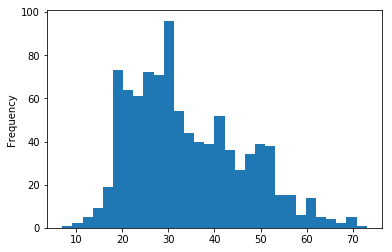

In [109]:
data_tmp.age.plot.hist(bins=30)
plt.show()